In [1]:
import pandas as pd

In [2]:
import pandas as pd

# Load the dataset with the correct delimiter
data = pd.read_csv("C:/Users/Admin/OneDrive/Desktop/Machine learning/bank-full.csv", delimiter=";")
data




,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
# Get dataset information
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None


In [4]:
# Check the distribution of the target variable
print(data['y'].value_counts())


y
no     39922
yes     5289
Name: count, dtype: int64


In [5]:
# Check for missing values
print(data.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [6]:
import pandas as pd

# Assuming 'data' is your DataFrame
X = data.drop(columns=['y'])  # Define X by dropping the target column
X = pd.get_dummies(X, columns=['job', 'marital', 'education', 'contact', 'month', 'poutcome'])
X



,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,no,2143,yes,no,5,261,1,-1,0,...,False,False,True,False,False,False,False,False,False,True
1,44,no,29,yes,no,5,151,1,-1,0,...,False,False,True,False,False,False,False,False,False,True
2,33,no,2,yes,yes,5,76,1,-1,0,...,False,False,True,False,False,False,False,False,False,True
3,47,no,1506,yes,no,5,92,1,-1,0,...,False,False,True,False,False,False,False,False,False,True
4,33,no,1,no,no,5,198,1,-1,0,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,17,977,3,-1,0,...,False,False,False,True,False,False,False,False,False,True
45207,71,no,1729,no,no,17,456,2,-1,0,...,False,False,False,True,False,False,False,False,False,True
45208,72,no,5715,no,no,17,1127,5,184,3,...,False,False,False,True,False,False,False,False,True,False
45209,57,no,668,no,no,17,508,4,-1,0,...,False,False,False,True,False,False,False,False,False,True


In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['default'] = le.fit_transform(X['default'])
X['housing'] = le.fit_transform(X['housing'])
X['loan'] = le.fit_transform(X['loan'])


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']] = scaler.fit_transform(X[['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']])


In [9]:
import pandas as pd

# Assuming 'data' is your DataFrame
y = data['y']  # Define y as the target column

# Map "yes" to 1 and "no" to 0
y = y.map({"yes": 1, "no": 0})
y



0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [10]:
# Assuming 'data' is your DataFrame and 'y' is the target variable

# Convert "yes" to 1 and "no" to 0 in the 'y' column
data['y'] = data['y'].map({"yes": 1, "no": 0})

# Display the entire dataset
print(data)


       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pd

In [11]:
# Check for missing values
print(data.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [12]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the splits
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)


Training Features Shape: (36168, 48)
Testing Features Shape: (9043, 48)


In [13]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Display the model details
print("Decision Tree Classifier trained successfully!")


Decision Tree Classifier trained successfully!


In [14]:
# Predict on the test set
y_pred = dt_classifier.predict(X_test)

# Display predictions
print("Predictions:", y_pred)


Predictions: [0 0 0 ... 0 0 0]


In [16]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluate the model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8742673891407718
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      7952
           1       0.48      0.49      0.48      1091

    accuracy                           0.87      9043
   macro avg       0.70      0.71      0.71      9043
weighted avg       0.88      0.87      0.87      9043



In [17]:
#Step 8: Hyperparameter Optimization (Optional)
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), 
                           param_grid=param_grid, 
                           cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Display the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Train the optimized model
best_dt_classifier = grid_search.best_estimator_
best_dt_classifier.fit(X_train, y_train)

# Evaluate the optimized model
y_pred_optimized = best_dt_classifier.predict(X_test)
print("Optimized Model Accuracy:", accuracy_score(y_test, y_pred_optimized))
print("Optimized Classification Report:\n", classification_report(y_test, y_pred_optimized))


Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Score: 0.9023170305699223
Optimized Model Accuracy: 0.8973791883224593
Optimized Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      7952
           1       0.65      0.33      0.44      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.65      0.69      9043
weighted avg       0.88      0.90      0.88      9043



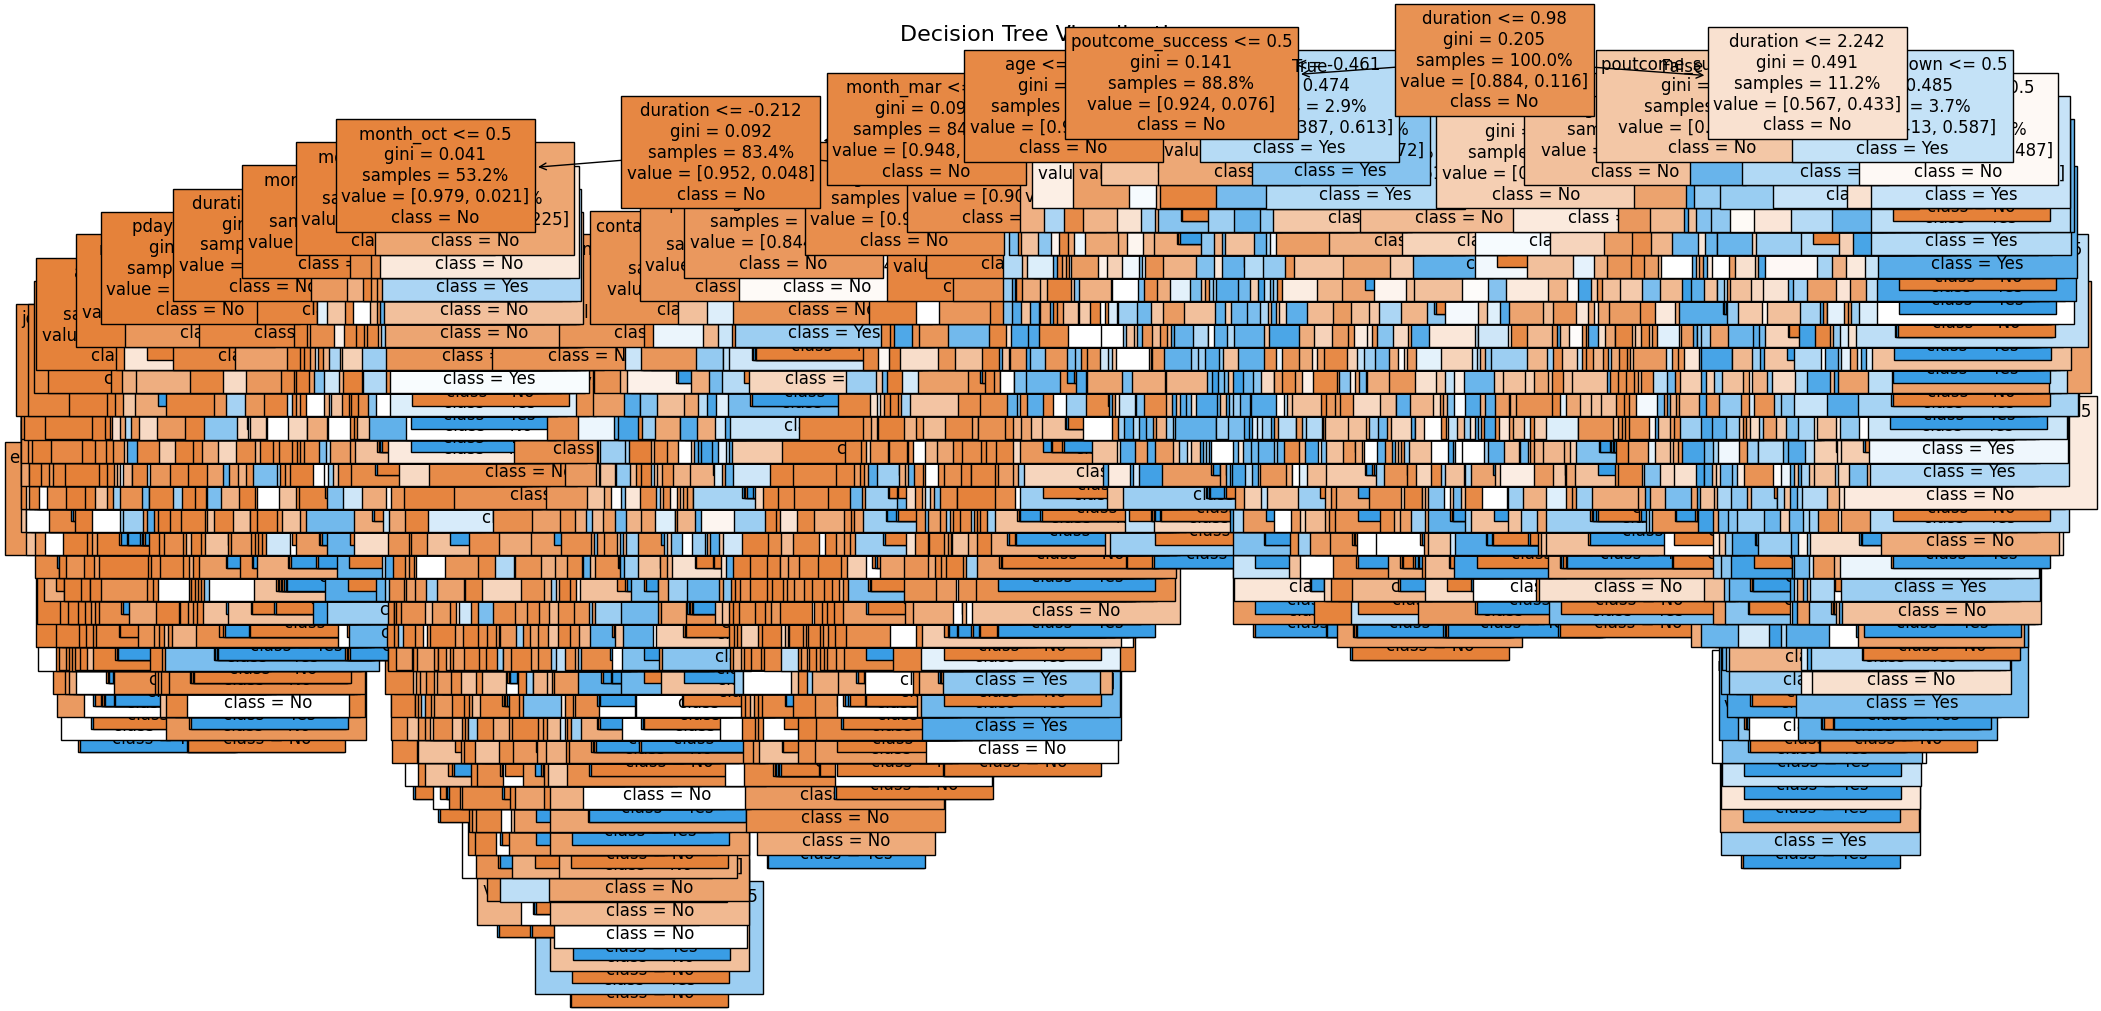

In [18]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Increase DPI and adjust figure size for better resolution and spacing
plt.figure(figsize=(24, 12), dpi=100)

# Plot the decision tree with improved readability
plot_tree(
    dt_classifier,
    feature_names=X.columns,
    class_names=['No', 'Yes'],
    filled=True,
    fontsize=12,  # Adjust font size for better readability
    proportion=True  # Adjust proportions for balanced layouts
)

plt.title("Decision Tree Visualization", fontsize=16)  # Add a title with a larger font size
plt.show()


Interpreting the Graph:
Path to "Yes" (Customer Will Purchase):

If duration > threshold (e.g., > 0.5 in the graph), the customer is likely to purchase.
If poutcome_success = Yes (previous campaign success), this strengthens the likelihood of a "Yes."
Certain months like October (as shown in the graph) are associated with higher probabilities of purchase.
Path to "No" (Customer Will Not Purchase):

If duration <= threshold, most customers are unlikely to purchase (class = No).
If poutcome_success = No and the contact occurred in an unfavorable month (e.g., not October), the chance of purchase is further reduced.
Class Balance:

Based on the leaf nodes, it is clear that the majority of customers fall into the No category (did not purchase). However, there are clear decision paths that lead to "Yes."



Conclusion: Based on the decision tree graph, the majority of customers will not purchase the product or service. This conclusion is primarily due to key factors such as short call durations and unsuccessful outcomes of previous marketing campaigns.

The tree shows that call duration is the most critical determinant: when calls are brief, customers are less likely to engage and make a purchase. Additionally, if the customer had a negative experience or outcome in a prior campaign (poutcome_success = No), the likelihood of purchasing decreases even further. These two factors dominate the paths in the decision tree, leading to the classification of most customers as No for purchase.




Knowledge Gained:
Feature Importance:

The task provides insights into which variables are most influential in predicting customer behavior, which is valuable for strategic marketing.
    
 Overfitting Awareness:

Overly complex models like this tree indicate the importance of regularization techniques, such as pruning, to improve model generalization.

Real-World Application:

This task demonstrates how machine learning can directly impact business outcomes by predicting customer behavior and optimizing resource allocation.